### Breast Cancer Detection Using Multilayer Perceptron

In this exercise, you will use Multilayer Perceptron to classify whether a patient has benign or malignant cancer cells using the given breast cancer dataset. 

### Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
cancer_df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], 'target'))
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Prepare the dataset for training and testing (1 point)

In [3]:
# Write code here to generate the train and test sets.
x = cancer_df.drop('target', axis=1)
y = cancer_df['target']

from sklearn.model_selection import train_test_split

#70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)

### Normalize the data (1 point)


In [4]:
# Write code here
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-0.2125105 , -0.43627451, -0.21842238, ..., -0.42094385,
        -0.50387289, -0.53198273],
       [-0.10677405, -0.1232493 , -0.14814547, ..., -0.31277988,
        -0.46573982, -0.63374294],
       [-0.56924749, -0.26190476, -0.58513484, ..., -0.42969342,
        -0.51300894, -0.58326137],
       ...,
       [-0.72933445, -0.47478992, -0.75504302, ..., -1.        ,
        -0.87845084, -0.88522086],
       [ 0.61164089,  0.11694678,  0.66452173, ...,  0.88287978,
        -0.36643496, -0.59256061],
       [-0.35283364, -0.98459384, -0.36201287, ..., -0.48970031,
        -0.56027805, -0.80126204]])

### Train and test the model (1 point)

In [5]:
# Write code here to train the model.
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(7),max_iter=10000,learning_rate_init=0.001,activation='tanh')
mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)

### Print the classification report (1 point)

In [6]:
# Write code here
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95        55
         1.0       0.97      0.98      0.98       116

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



### Display confusion matrix (1 point)

Text(113.9222222222222, 0.5, 'true value')

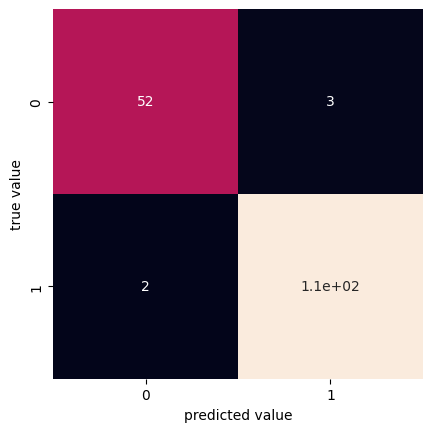

In [7]:
# Write code here to generate the confusion matrix
mat = confusion_matrix(y_test,predictions)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

### Improve the model by hyperparameter tuning. Use GridSearchCV. (4 points)
Finding the right parameter values (such as activation function, max iteration) could be tricky. Experimenting on the right combination of values systematically can be done using GridSearchCV.

GridSearchCV takes a dictionary as input that describes the parameters that should be tested and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

Read more about GridSearchCV here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [31]:
# Write code here to tune your hyperparameter. You can decide what parameter and values to use.### Create a dictionary called param_grid and fill out some parameters such as activation and max_iter.
param_grid = {'max_iter': [10000, 20000], 'learning_rate_init': [0.001, 0.0005, 0.01], 'activation': ['identity', 'logistic', 'tanh', 'relu']}

In [32]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 4)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END activation=identity, learning_rate_init=0.001, max_iter=10000;, score=0.950 total time=   0.5s
[CV 2/5] END activation=identity, learning_rate_init=0.001, max_iter=10000;, score=0.975 total time=   0.4s
[CV 3/5] END activation=identity, learning_rate_init=0.001, max_iter=10000;, score=0.975 total time=   0.5s
[CV 4/5] END activation=identity, learning_rate_init=0.001, max_iter=10000;, score=0.937 total time=   0.5s
[CV 5/5] END activation=identity, learning_rate_init=0.001, max_iter=10000;, score=0.949 total time=   0.4s
[CV 1/5] END activation=identity, learning_rate_init=0.001, max_iter=20000;, score=0.988 total time=   0.3s
[CV 2/5] END activation=identity, learning_rate_init=0.001, max_iter=20000;, score=0.975 total time=   0.4s
[CV 3/5] END activation=identity, learning_rate_init=0.001, max_iter=20000;, score=0.975 total time=   0.3s
[CV 4/5] END activation=identity, learning_rate_init=0.001, max_iter=20000

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'learning_rate_init': [0.001, 0.0005, 0.01],
                         'max_iter': [10000, 20000]},
             verbose=4)

### Use the best parameters found to generate new predictions using best_params

In [33]:
grid.best_params_

{'activation': 'relu', 'learning_rate_init': 0.0005, 'max_iter': 10000}

In [34]:
grid_prediction = grid.predict(x_test)

### Print the classification report.

In [35]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        55
         1.0       0.98      0.98      0.98       116

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### Conclusion (1 point)
After tuning the parameters for MLP, what can you say about the performance/results of MLP in breast cancer detection?

There was imrpovement in the overall performance of the MLP which is reflected in the f1-score. The previous f1-score of the first class was 0.95 and after tuning, it increased to 0.98, a 0.03 point improvement. The improvements are also reflected in the overall accuracy, and macro and weighted average. Overall, a significant improvement was seen in the overall result of the MLP after tuning. 